<a href="https://colab.research.google.com/github/muhajirakbarhsb/NLP_class_2023/blob/main/Week_Class_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = pd.read_csv('data_clean_all.csv')
data

,at,content,score,userName,contentp,contentp_clean
0,2023-10-06 10:07:21,"makin sini makin parah , Lola, mahal",1,MIFTAHUDDIN JUHDI,makin sini makin parah lola mahal,makin sini makin parah lambat mahal
1,2023-10-06 07:27:57,Makin hari paket nya makin mahal,1,Fandi Rahmadi,makin hari paket nya makin mahal,makin hari paket nya makin mahal
2,2023-10-06 06:12:55,"Semua saran sudah kami lakukan, hasilnya tetap...",1,Jimmy Jimmy,semua saran sudah kami lakukan hasilnya tetap ...,semua saran kami laku hasil tetap lambat sisa ...
3,2023-10-06 04:12:21,Aplikasi yang baik,5,Princess Khan,aplikasi yang baik,aplikasi baik
4,2023-10-05 15:41:08,"Siapa yang menyesal beli modem ini,🙋🙋🙋 aku aku...",1,PETER 65,siapa yang menyesal beli modem ini aku aku aku...,siapa sesal beli modem aku aku aku paket nya m...
...,...,...,...,...,...,...
3183,2023-01-01 08:28:28,Internet jelek,1,Rafael,internet jelek,internet jelek
3184,2023-01-01 07:54:02,Pilihan Menu pembelian paket nya gak ada.. gan...,5,Rahmat Samsudin,pilihan menu pembelian paket nya gak ada gangg...,pilih menu beli paket nya ada ganggu
3185,2023-01-01 06:10:55,Sekarang gak bisa beli kuota 100gb... cuma ada...,1,aby habibie,sekarang gak bisa beli kuota gb cuma ada gb gb...,sekarang bisa beli kuota gb cuma gb gb buat ap...
3186,2023-01-01 02:48:24,Saya sudah pakai orbit hampir 1thn tapi kemari...,5,Azkayrah Zahwa,saya sudah pakai orbit hampir thn tapi kemarin...,pakai orbit hampir thn kemarin mau sambung hp ...


In [4]:
data = data[['contentp_clean']]
data = data.dropna()
data

,contentp_clean
0,makin sini makin parah lambat mahal
1,makin hari paket nya makin mahal
2,semua saran kami laku hasil tetap lambat sisa ...
3,aplikasi baik
4,siapa sesal beli modem aku aku aku paket nya m...
...,...
3183,internet jelek
3184,pilih menu beli paket nya ada ganggu
3185,sekarang bisa beli kuota gb cuma gb gb buat ap...
3186,pakai orbit hampir thn kemarin mau sambung hp ...


In [13]:
list_data  = data['contentp_clean'].tolist()

In [14]:
list_data[:3]

['makin sini makin parah lambat mahal',
 'makin hari paket nya makin mahal',
 'semua saran kami laku hasil tetap lambat sisa lempar belum']

In [9]:
from textblob import TextBlob
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:

data_we = []
for doc in list_data:
    Tokens = [str(w) for w in TextBlob(doc).words]
    data_we.append(Tokens)
print(data_we[:3])

[['makin', 'sini', 'makin', 'parah', 'lambat', 'mahal'], ['makin', 'hari', 'paket', 'nya', 'makin', 'mahal'], ['semua', 'saran', 'kami', 'laku', 'hasil', 'tetap', 'lambat', 'sisa', 'lempar', 'belum']]


In [21]:
from gensim.models import Word2Vec

L = 300 # Jumlah neurons = ukuran vektor = jumlah kolom
model_wv = Word2Vec(data_we, min_count=2, window = 5, workers= -2)
# min_count adalah jumlah kata minimal yang muncul di corpus
# "size" adalah Dimensionality of the word vectors
# (menurut beberapa literature untuk text disarankan 300-500)
# "window" adalah jarak maximum urutan kata yang di pertimbangkan
# workers = jumlah prosesor yang digunakan untuk menjalankan word2vec
print('Done!...')

Done!...


In [23]:
model_wv.save('model_w2v')
model_wv = Word2Vec.load('model_w2v')
print('Done!...')

Done!...


In [24]:
# Melihat vector suatu kata
vektor = model_wv.wv.__getitem__(['orbit'])
print(len(vektor[0])) # Panjang vektor keseluruhan = jumlah neuron yang digunakan
print(vektor[0][:5]) # 5 elemen pertama dari vektornya

100
[-0.00861969  0.00366574  0.00518988  0.00574194  0.00746692]


In [26]:
# Mencari kata terdekat menurut data training dan Word2Vec
model_wv.wv.most_similar('orbit')

[('chat', 0.3641005754470825),
 ('kes', 0.3260115385055542),
 ('pindahin', 0.3116496205329895),
 ('ber', 0.27811264991760254),
 ('pascabayar', 0.276193767786026),
 ('so', 0.26585566997528076),
 ('eg', 0.2404729723930359),
 ('langit', 0.2382783442735672),
 ('hape', 0.23504950106143951),
 ('stelahnya', 0.23276032507419586)]

In [28]:
# Mencari kata terdekat menurut data training dan Word2Vec
model_wv.wv.most_similar('mahal')

[('banyak', 0.3144782483577728),
 ('jelek', 0.31288501620292664),
 ('done', 0.28451067209243774),
 ('fasilitas', 0.27166733145713806),
 ('mengunakan', 0.2678593397140503),
 ('online', 0.2590188682079315),
 ('belakang', 0.25502362847328186),
 ('website', 0.25378739833831787),
 ('lepas', 0.2488432675600052),
 ('ko', 0.24795961380004883)]

In [31]:
# Melihat similarity antar kata
print(model_wv.wv.similarity('telkomsel', 'orbit'))
print(model_wv.wv.similarity('mahal', 'orbit'))
print(model_wv.wv.similarity('orbit', 'orbit'))

-0.018412216
0.00831596
0.99999994


In [32]:
# error jika kata tidak ada di training data
# beckman bukan beckmans ==> hence di Word Embedding PreProcessing harus thourough

kata = 'XL'
try:
    print(model_wv.wv.most_similar(kata))
except:
    print('error! kata "',kata,'" tidak ada di training data')
# ini salah satu kelemahan Word2Vec

error! kata " XL " tidak ada di training data


In [37]:
model_wv.wv.doesnt_match(['telkomsel' , 'orbit' , 'telkom' , 'jaringan'])

'orbit'

In [47]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [48]:
def plot(model, words):

    arr = np.empty((0,100), dtype='f')
    word_labels = []

    for word in words:
        wrd_vector = model[word]
        word_labels.append(word)
        arr = np.append(arr, np.array([wrd_vector]), axis=0)


    # find tsne coords for 2 dimensions
    pca = PCA(n_components=2, copy=False, whiten=True)
    Y = pca.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

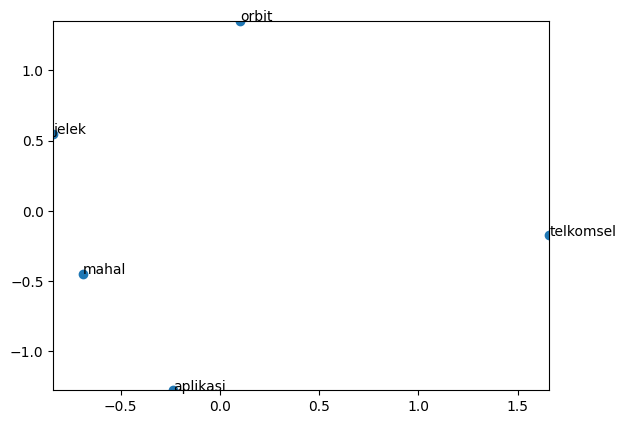

In [49]:
plot(model_wv.wv, ["telkomsel", "orbit", "jelek", "aplikasi", "mahal"])

In [58]:
len(list_data)

3166

##Model klasifikasi

In [59]:
w2v = dict(zip(model_wv.wv.index_to_key, model_wv.wv.vectors))

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(list_data)

    def tokenize(self, sentences):
        return [sentence.lower().split(" ") for sentence in sentences]


    def transform(self, X):
        # Ambil kata-katanya lalu rata-rata
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

vectorizer = MeanEmbeddingVectorizer(w2v)

In [80]:
vectorizer.word2vec

{'paket': array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
        -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
        -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
        -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
         2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
         7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
         6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
        -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
         9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
         8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
        -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
        -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
         4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
        -4.1370760e-03,  8.2453608e-04,  8.4986202e-03,

In [64]:
train_teks = ["aplikasinya jelek sekali" ,
              "paketnya sangat mahal" ,
              "telkomsel terbaik deh" ,
              "paketnya sangat murah" ,
              "i love telkomsel" ,
              "pelayanan jelek " ,
              "' sangat mahal untuk jaringan yang jelek" ,
              "telkomsel jelek"
             ]

train_y = [1 , 1, 0 ,0 , 0,1  , 1 , 1]

train_X = vectorizer.transform(vectorizer.tokenize(train_teks))

test_teks = ["mahal mahal mahal" ,
              "pelayanan tidak memuaskan" ,
              "jaringan bagus"
             ]

test_y = [1 , 1 , 0]

test_X = vectorizer.transform(vectorizer.tokenize(test_teks))

In [74]:
train_X

array([[ 5.30462945e-03,  4.44533303e-03,  5.49905375e-03,
        -2.92317104e-03,  3.37956566e-03, -3.12858284e-03,
        -9.47494060e-03,  6.01958018e-05, -7.19863782e-03,
        -2.94116931e-03, -5.90697513e-04,  4.45660669e-03,
         2.75731785e-03,  8.35731532e-03,  6.47197384e-03,
         3.22872587e-03, -4.45349514e-03,  3.75325512e-03,
        -5.49890194e-03, -6.63353363e-03,  6.17024302e-03,
        -8.39767046e-03,  4.75866348e-03, -3.72439437e-03,
        -2.75820727e-03, -4.19622939e-03, -6.40306901e-03,
         2.63656233e-03,  8.62619840e-04, -1.80690456e-03,
        -1.96558586e-03, -1.05454563e-03,  4.08055121e-03,
        -3.04510607e-03,  1.46460999e-03,  5.18699875e-04,
        -3.76602891e-03,  8.49857181e-03,  1.09457062e-03,
        -2.08777376e-03,  1.81510032e-03,  5.13378996e-04,
        -8.96556303e-05,  1.58712617e-03,  7.03839120e-04,
        -3.76333692e-03,  5.15846349e-03,  1.24439073e-03,
        -5.45831071e-03,  6.68898458e-03, -3.28462687e-0

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])

# Gridsearch to determine the value of C
param_grid = {'SVC__C':[10**(i/8) for i in range(-24, 25)]}
clf = GridSearchCV(SVCpipe,param_grid,cv=4,return_train_score=True)
clf.fit(train_X,train_y)
print(clf.best_params_)
#linearSVC.coef_
#linearSVC.intercept_

bestlinearSVC = clf.best_estimator_
bestlinearSVC.fit(train_X,train_y)
bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
bestlinearSVC.score(test_X,test_y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


{'SVC__C': 13.33521432163324}


0.6666666666666666

In [92]:
new_text_data = ["aplikasi lelet", "aplikasi bagus", "mahal paketnya"]
new_data_X = vectorizer.transform(vectorizer.tokenize(new_text_data))

In [93]:
new_data_X

array([[ 9.4563962e-05,  3.0773198e-03, -6.8126451e-03, -1.3754654e-03,
         7.6685809e-03,  7.3464094e-03, -3.6732971e-03,  2.6427018e-03,
        -8.3171297e-03,  6.2054861e-03, -4.6373224e-03, -3.1641065e-03,
         9.3113566e-03,  8.7338570e-04,  7.4907029e-03, -6.0740625e-03,
         5.1605068e-03,  9.9228229e-03, -8.4573915e-03, -5.1356913e-03,
        -7.0648370e-03, -4.8626517e-03, -3.7785638e-03, -8.5361991e-03,
         7.9556061e-03, -4.8439382e-03,  8.4236134e-03,  5.2625705e-03,
        -6.5500261e-03,  3.9578713e-03,  5.4701497e-03, -7.4265362e-03,
        -7.4057197e-03, -2.4752307e-03, -8.6257253e-03, -1.5815723e-03,
        -4.0343284e-04,  3.2996845e-03,  1.4418805e-03, -8.8142155e-04,
        -5.5940580e-03,  1.7303658e-03, -8.9737179e-04,  6.7936908e-03,
         3.9735902e-03,  4.5294715e-03,  1.4343059e-03, -2.6998555e-03,
        -4.3668128e-03, -1.0320747e-03,  1.4370275e-03, -2.6460087e-03,
        -7.0737829e-03, -7.8053069e-03, -9.1217868e-03, -5.93516

In [94]:
from sklearn.preprocessing import StandardScaler

# Assuming you have prepared and vectorized your new data as 'new_data_X'
# Create a StandardScaler instance and fit it on your training data
scaler = StandardScaler()
scaler.fit(train_X)  # Fit the scaler on your training data

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_X)

# Use the 'bestlinearSVC' model to make predictions on the scaled new data
new_predictions = bestlinearSVC.predict(new_data_scaled)

# The 'new_predictions' variable now contains the predicted labels for the new data

In [95]:
new_predictions

array([0, 0, 1])